<div align="center">
  <h1><b>Penyisihan Datavidia 9</b></h1>
  <p><b>Supercalifragilisticexpialidocious</b></p>
  <span style="font-size: 12px;">Author: <a href="https://github.com/ChristellaCindy">Christella Cindy</a>, <a href="https://github.com/Frederickkrisna">Frederick Krisna</a>, and <a href="https://github.com/williamtheodoruswijaya">William Theodorus</a></span>
</div>
<hr>

### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from arch import arch_model

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

- `Evaluation`

In [3]:
def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    float: The calculated MAPE.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true))

### 2. Load Dataset
---
untuk training, kita akan coba pakai salah terlebih dahulu yaitu "Bawang Merah"

In [4]:
path = "/Users/Frederick/Documents/Datavidia/Harga Bahan Pangan"
files = [
    "Bawang Merah", "Bawang Putih Bonggol", "Beras Medium", "Beras Premium",
    "Cabai Merah Keriting", "Cabai Rawit Merah", "Daging Ayam Ras",
    "Daging Sapi Murni", "Gula Konsumsi", "Minyak Goreng Curah",
    "Minyak Goreng Kemasan Sederhana", "Telur Ayam Ras", "Tepung Terigu (Curah)"
]

# Load data
df_list = {}
for file in files:
    df = pd.read_csv(f"{path}/train/{file}.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df_list[file] = df

# For Training purpose, we use only Bawang Merah since all training have the same approach
df = df_list["Bawang Merah"]
df.head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,28970.0,20870.0,26890.0,26650.0,25240.0,35510.0,31740.0,23390.0,25800.0,24870.0,...,48610.0,29240.0,25160.0,24910.0,28030.0,30380.0,35750.0,23360.0,26670.0,28710.0
2022-01-02,29900.0,20710.0,25600.0,26950.0,25240.0,31850.0,30020.0,23550.0,26010.0,24630.0,...,50160.0,28750.0,24770.0,24360.0,27200.0,30260.0,35630.0,23790.0,25690.0,28460.0
2022-01-03,28970.0,20510.0,26390.0,27290.0,24620.0,34880.0,31250.0,23730.0,25910.0,24810.0,...,49510.0,27870.0,24140.0,24740.0,26750.0,30080.0,34980.0,22620.0,26270.0,28050.0
2022-01-04,29600.0,20180.0,26630.0,27450.0,24370.0,35260.0,31640.0,23300.0,25950.0,24910.0,...,49670.0,28330.0,24450.0,24710.0,28800.0,29950.0,34920.0,23010.0,26800.0,27800.0
2022-01-05,29540.0,19960.0,26610.0,27710.0,24210.0,35260.0,34010.0,23640.0,25700.0,24580.0,...,46590.0,28240.0,24640.0,24780.0,28990.0,30240.0,34000.0,23330.0,25360.0,27670.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-01-01 to 2024-09-30
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aceh                       967 non-null    float64
 1   Bali                       968 non-null    float64
 2   Banten                     967 non-null    float64
 3   Bengkulu                   967 non-null    float64
 4   DI Yogyakarta              968 non-null    float64
 5   DKI Jakarta                967 non-null    float64
 6   Gorontalo                  969 non-null    float64
 7   Jambi                      966 non-null    float64
 8   Jawa Barat                 967 non-null    float64
 9   Jawa Tengah                970 non-null    float64
 10  Jawa Timur                 969 non-null    float64
 11  Kalimantan Barat           968 non-null    float64
 12  Kalimantan Selatan         967 non-null    float64
 13  Kalimantan Tengah          968

In [6]:
df.describe()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
count,967.000000,968.000000,967.000000,967.000000,968.000000,967.000000,969.000000,966.000000,967.000000,970.000000,...,967.000000,969.000000,965.000000,970.000000,970.000000,968.000000,970.000000,969.000000,966.000000,968.000000
mean,34740.020683,28202.200413,34011.065150,34812.130300,30753.657025,41475.170631,38127.925697,28944.668737,33151.437435,32025.659794,...,56483.588418,33857.058824,33921.761658,32272.938144,38495.804124,38152.283058,41372.639175,29558.513932,33948.768116,33269.855372
std,7681.229521,6421.992994,7649.079784,7773.763022,7927.974207,8408.909831,8728.726011,6416.316381,7004.698549,7615.586946,...,6371.926349,6382.373885,7720.342128,6415.372930,7957.852936,7174.630795,7472.247742,7196.162937,7967.704855,7067.779796
min,21860.000000,14810.000000,21460.000000,19520.000000,16200.000000,26580.000000,21250.000000,17180.000000,22000.000000,19340.000000,...,45850.000000,21720.000000,21440.000000,21580.000000,23590.000000,26420.000000,28080.000000,15870.000000,20190.000000,20660.000000
25%,30555.000000,24215.000000,29625.000000,30915.000000,25755.000000,36915.000000,33330.000000,25475.000000,28985.000000,26960.000000,...,51755.000000,29880.000000,29050.000000,27722.500000,33900.000000,32977.500000,37495.000000,25280.000000,29565.000000,29497.500000
50%,33790.000000,28150.000000,32770.000000,34370.000000,30185.000000,40500.000000,37640.000000,28355.000000,31860.000000,30855.000000,...,56010.000000,33080.000000,33820.000000,32160.000000,37555.000000,37830.000000,40810.000000,28790.000000,33265.000000,32245.000000
75%,36660.000000,30935.000000,37285.000000,37750.000000,35450.000000,44300.000000,42930.000000,31412.500000,37020.000000,36037.500000,...,59915.000000,36560.000000,37740.000000,35447.500000,42190.000000,41520.000000,44357.500000,32170.000000,37155.000000,35030.000000
max,61030.000000,53400.000000,68970.000000,61590.000000,61470.000000,74630.000000,78300.000000,48820.000000,65350.000000,64100.000000,...,80580.000000,51060.000000,72100.000000,61080.000000,74190.000000,68590.000000,74340.000000,50350.000000,63140.000000,55830.000000


### 3. EDA + Data Preprocessing

> **3.1 Exploratory Data Analysis**

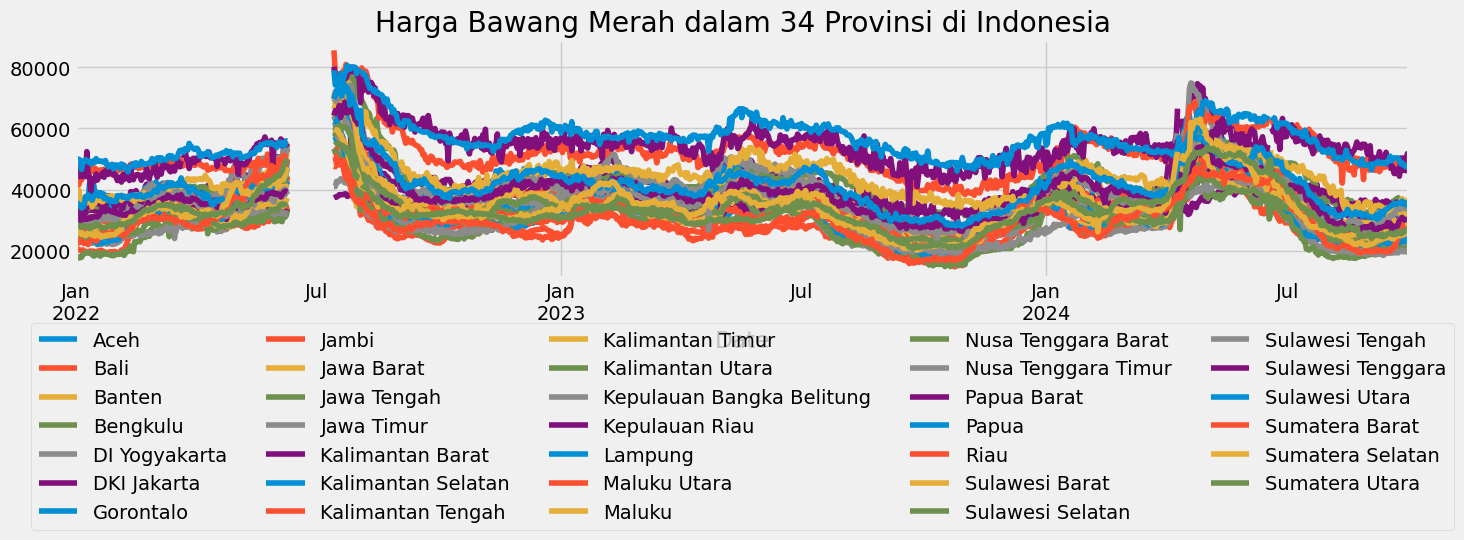

Jumlah Missing Value per Provinsi (sebelum cleaning):
Aceh                         37
Bali                         36
Banten                       37
Bengkulu                     37
DI Yogyakarta                36
DKI Jakarta                  37
Gorontalo                    35
Jambi                        38
Jawa Barat                   37
Jawa Tengah                  34
Jawa Timur                   35
Kalimantan Barat             36
Kalimantan Selatan           37
Kalimantan Tengah            36
Kalimantan Timur             39
Kalimantan Utara             39
Kepulauan Bangka Belitung    38
Kepulauan Riau               39
Lampung                      37
Maluku Utara                 36
Maluku                       37
Nusa Tenggara Barat          37
Nusa Tenggara Timur          34
Papua Barat                  39
Papua                        37
Riau                         35
Sulawesi Barat               39
Sulawesi Selatan             34
Sulawesi Tengah              34
Sulawesi Tenggara 

In [7]:
df.plot(figsize=(15, 6))
plt.title('Harga Bawang Merah dalam 34 Provinsi di Indonesia')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()
print("Jumlah Missing Value per Provinsi (sebelum cleaning):")
print(df_list["Bawang Merah"].isnull().sum())

**Insight:**

Berdasarkan visualisasi yang kita lihat, harga bawang merah memiliki missing data pada Juli 2023. Sehingga kita akan coba melakukan sedikit pendekatan dengan melakukan interpolasi data untuk mengisi kekosongan data ini.

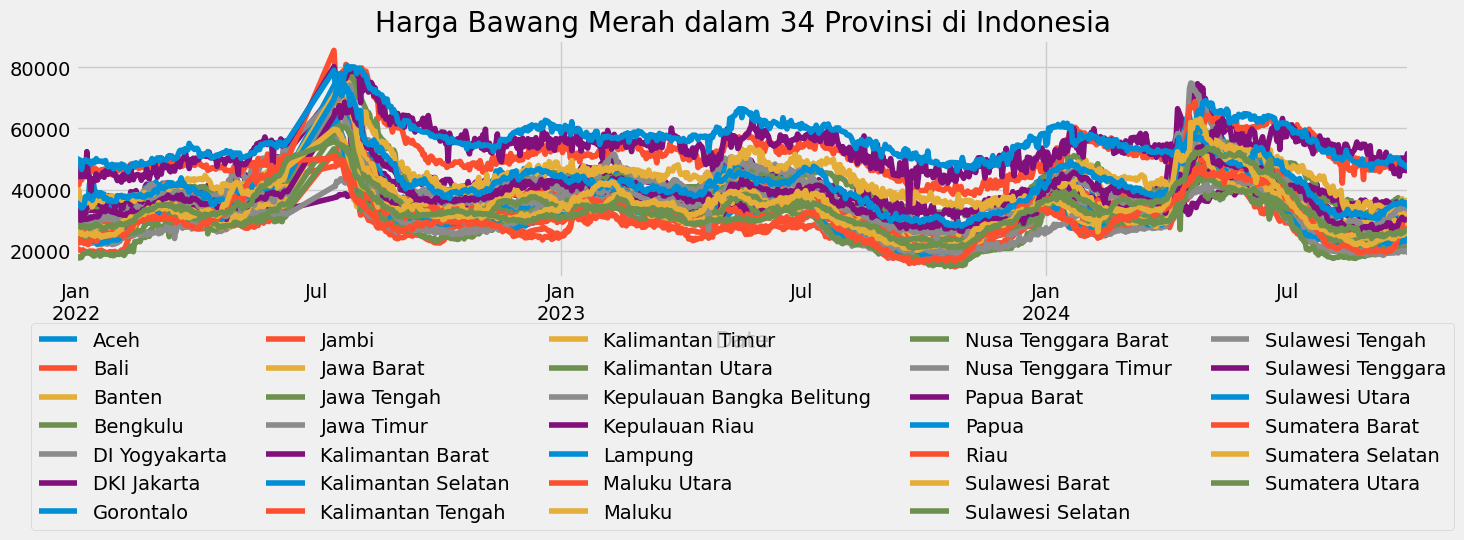

Jumlah Missing Value per Provinsi (sesudah cleaning):
Aceh                         0
Bali                         0
Banten                       0
Bengkulu                     0
DI Yogyakarta                0
DKI Jakarta                  0
Gorontalo                    0
Jambi                        0
Jawa Barat                   0
Jawa Tengah                  0
Jawa Timur                   0
Kalimantan Barat             0
Kalimantan Selatan           0
Kalimantan Tengah            0
Kalimantan Timur             0
Kalimantan Utara             0
Kepulauan Bangka Belitung    0
Kepulauan Riau               0
Lampung                      0
Maluku Utara                 0
Maluku                       0
Nusa Tenggara Barat          0
Nusa Tenggara Timur          0
Papua Barat                  0
Papua                        0
Riau                         0
Sulawesi Barat               0
Sulawesi Selatan             0
Sulawesi Tengah              0
Sulawesi Tenggara            0
Sulawesi Utara  

In [8]:
df.interpolate(method='linear', inplace=True)
df.plot(figsize=(15, 6))
plt.title('Harga Bawang Merah dalam 34 Provinsi di Indonesia')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()
print("Jumlah Missing Value per Provinsi (sesudah cleaning):")
print(df_list["Bawang Merah"].isnull().sum())

Sekarang, coba kita rapikan visualisasinya dengan memperkecil range tanggal kita. Misal, dalam tahun waktu seminggu, kira-kira bagaimana fluktuasi harga bahan pangannya.

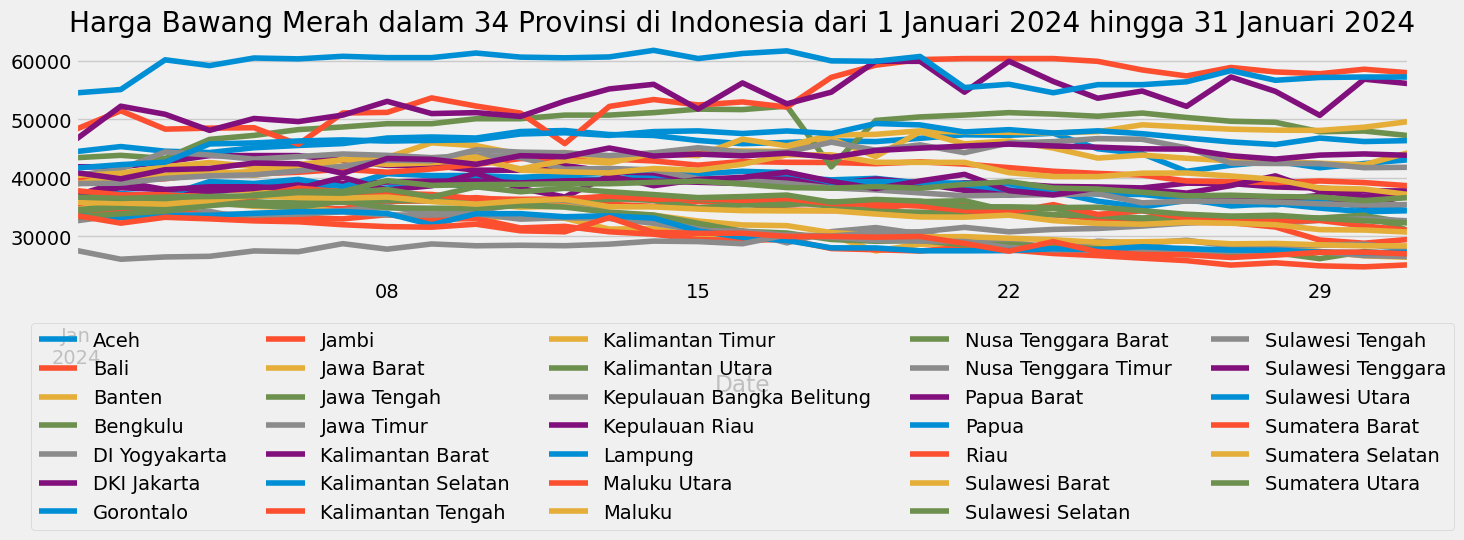

In [9]:
df_2024 = df[(df.index >= '2024-01-01') & (df.index <= '2024-01-31')]
df_2024.plot(figsize=(15, 6), lw = 4)
plt.title('Harga Bawang Merah dalam 34 Provinsi di Indonesia dari 1 Januari 2024 hingga 31 Januari 2024')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

> 3.2 **Feature Creation**: menambahkan kolom tambahan

Notes: fungsi ini akan dijalankan setelah proses `train_test_split`

In [10]:
def create_features(df):
    """
    Create time series features from datetime index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

> 3.3 **Handle Missing Values**:

In [11]:
def handle_missing_values(df):
    """
    Handle missing values in place
    """
    df = df.copy()
    df = df.ffill()
    df = df.bfill()
    return df

<Figure size 1500x600 with 0 Axes>

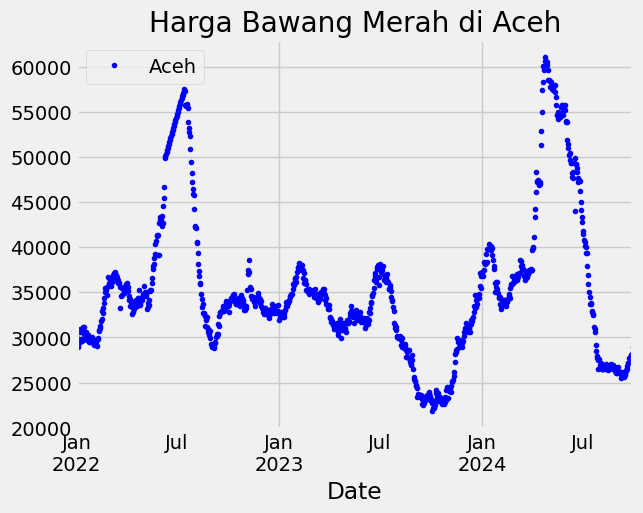

In [12]:
# Take 'Aceh' data only for training only
df_aceh = df[['Aceh']]

plt.figure(figsize=(15, 6))
df_aceh.plot(style='.', 
             color='blue', 
             title='Harga Bawang Merah di Aceh')
plt.show()

> 3.3 **Outlier Analysis & Removal** using `IsolationForest`

- **`IsolationForest`** parameters:
    - contamination: value yang dimasukkan itu antara 0-0.5, value ini merepresentasikan persentase overall data yang kita anggap sebagai outliers. Contoh, `contamination = 0.1` berarti sebanyak 10% dari data akan dianggap sebagai outliers (anomaly kalau istilah dalam model IsolationForest ini)
    - random_state: mirip seeds di minecraft cuman bedanya ini buat randomizer aja.

- **`IsolationForest`** functions:
    - `fit()`: dipakai untuk melakukan training model.
    - `decision_function()`: dipakai untuk menghasilkan sebuah anomaly scores yang hasilnya antara -1 dan 1 dimana semakin mendekati angka tersebut ke -1 berarti semakin besar tingkat abnormalitasnya.
    - `predict()`: dipakai untuk menggunakan model yang sudah ditrain terhadap data yang mau dianalisa (generalisasi)

In [13]:
MODEL_if = IsolationForest(contamination=0.01,
                           random_state=42)

if_analyze = df_aceh.copy()
MODEL_if.fit(df_aceh)

IsolationForest(contamination=0.01, random_state=42)

In [14]:
if_analyze['anomaly_scores'] = MODEL_if.decision_function(df_aceh)
if_analyze['anomaly'] = MODEL_if.predict(df_aceh)
if_analyze.head()

,Aceh,anomaly_scores,anomaly
Date,,,
2022-01-01,28970.0,0.184630,1
2022-01-02,29900.0,0.201436,1
2022-01-03,28970.0,0.184630,1
2022-01-04,29600.0,0.204016,1
2022-01-05,29540.0,0.201911,1


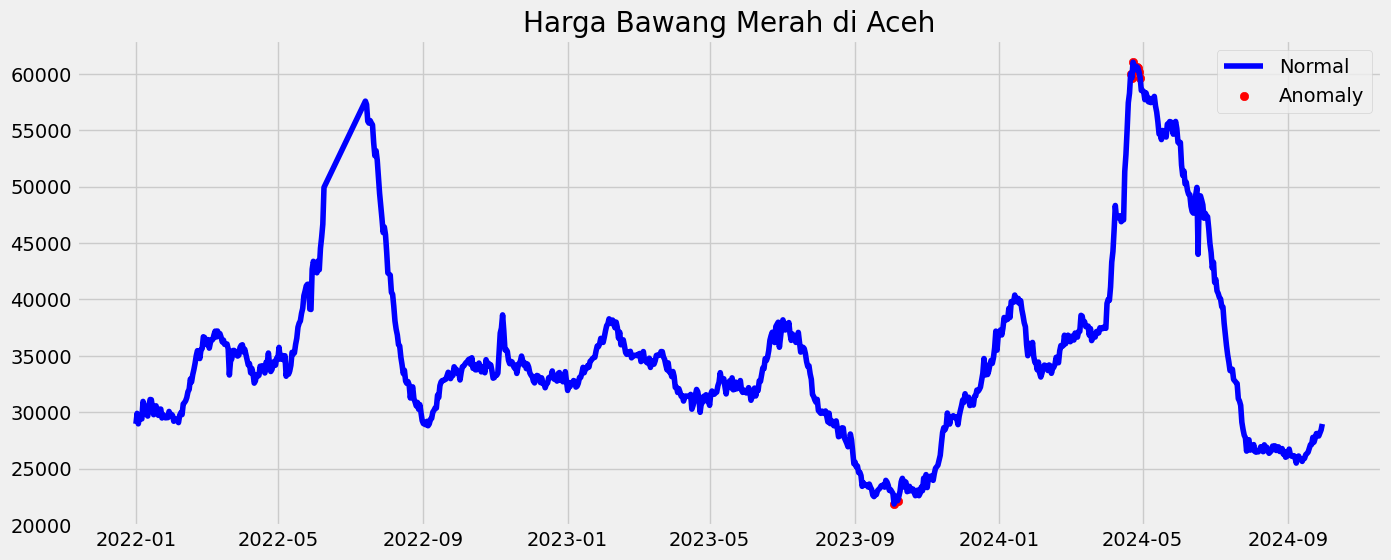

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(if_analyze.index, if_analyze['Aceh'], color='blue', label='Normal')
plt.scatter(if_analyze[if_analyze['anomaly'] == -1].index, 
            if_analyze[if_analyze['anomaly'] == -1]['Aceh'], 
            color='red', label='Anomaly')
plt.title('Harga Bawang Merah di Aceh')
plt.legend()
plt.show()

### 4. Train/Test Split

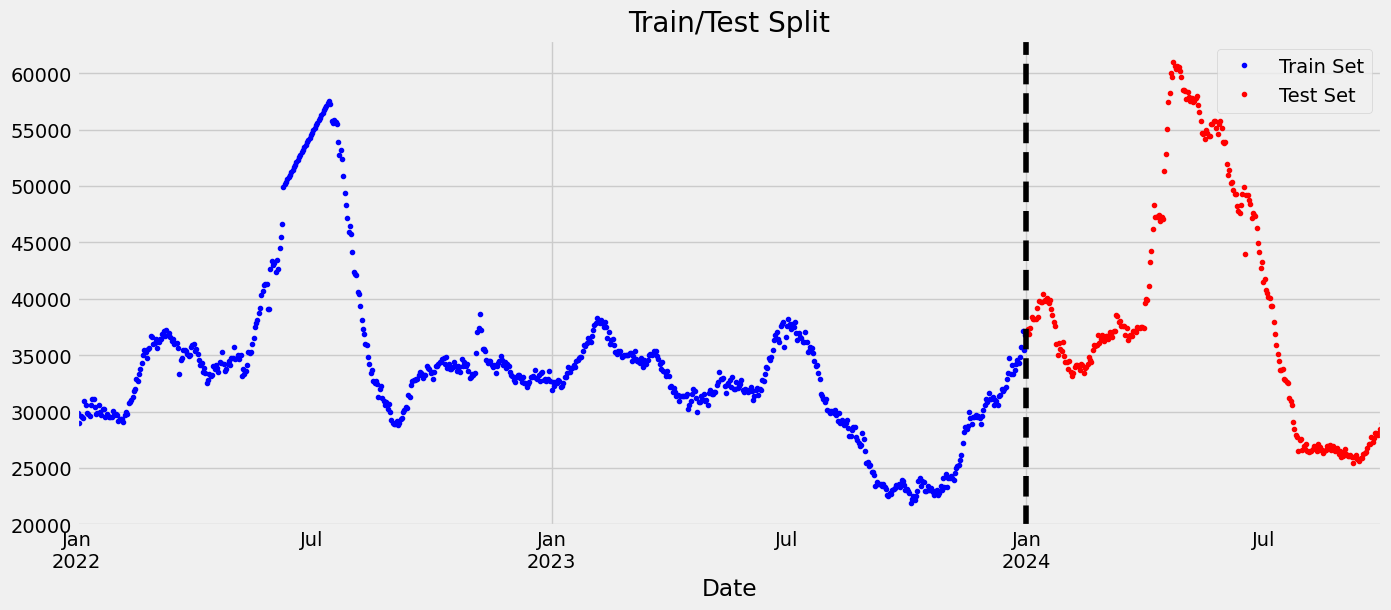

In [16]:
train_aceh = df_aceh.loc[df.index < '2024-01-01']
test_aceh = df_aceh.loc[df.index >= '2024-01-01']

fig, ax = plt.subplots(figsize=(15, 6))
train_aceh.plot(ax=ax, color='blue', style='.', lw=2)
test_aceh.plot(ax=ax, color='red', style='.', lw=2)
plt.title('Train/Test Split')
ax.axvline('01-01-2024', color='black', linestyle='--')
ax.legend(['Train Set', 'Test Set'])
plt.show()

### 5. **Features Engineering**: Memahami target relationship

In [17]:
# Sebelum itu, kita akan menambahkan fitur-fitur waktu ke dalam data
df_aceh = create_features(df_aceh)
df_aceh.head()

,Aceh,hour,dayofweek,quarter,month,year,dayofyear
Date,,,,,,,
2022-01-01,28970.0,0,5,1,1,2022,1
2022-01-02,29900.0,0,6,1,1,2022,2
2022-01-03,28970.0,0,0,1,1,2022,3
2022-01-04,29600.0,0,1,1,1,2022,4
2022-01-05,29540.0,0,2,1,1,2022,5


- **Visualize features**

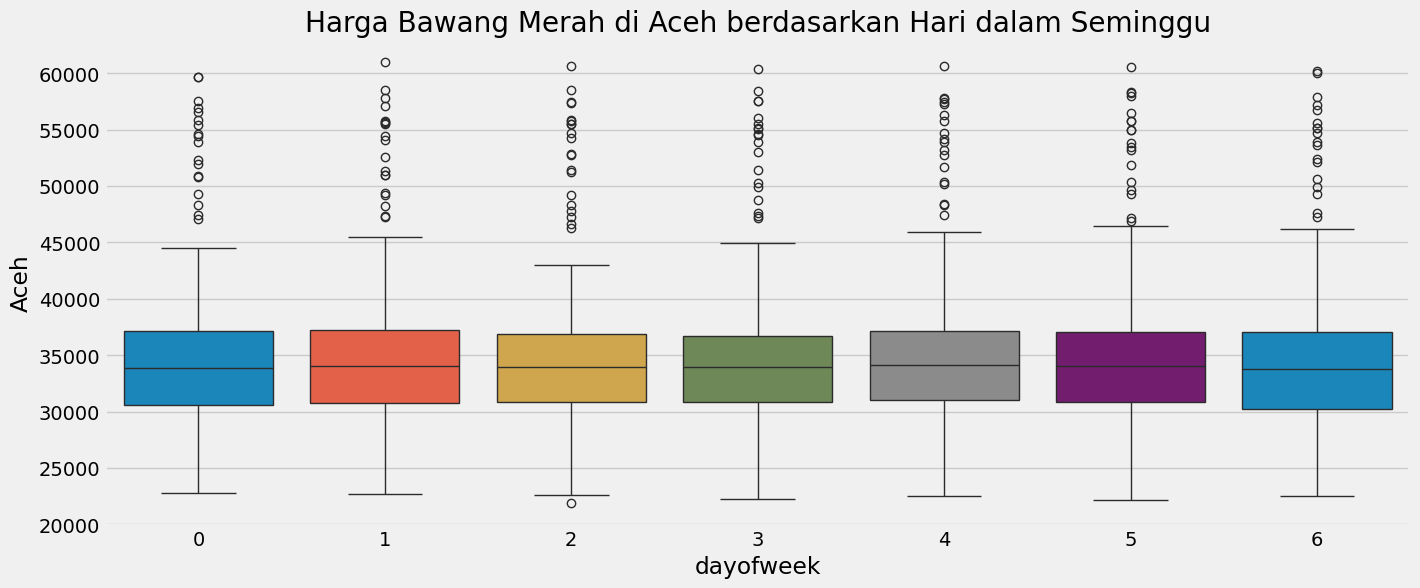

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_aceh, x='dayofweek', y='Aceh', palette=color_pal)
plt.title('Harga Bawang Merah di Aceh berdasarkan Hari dalam Seminggu')
plt.show()

**Insight**: Dari sini kita bisa menyimpulkan bahwa peningkatan harga dalam 1 minggu cenderung sangat sedikit atau mungkin bisa dibilang tidak ada sama sekali.

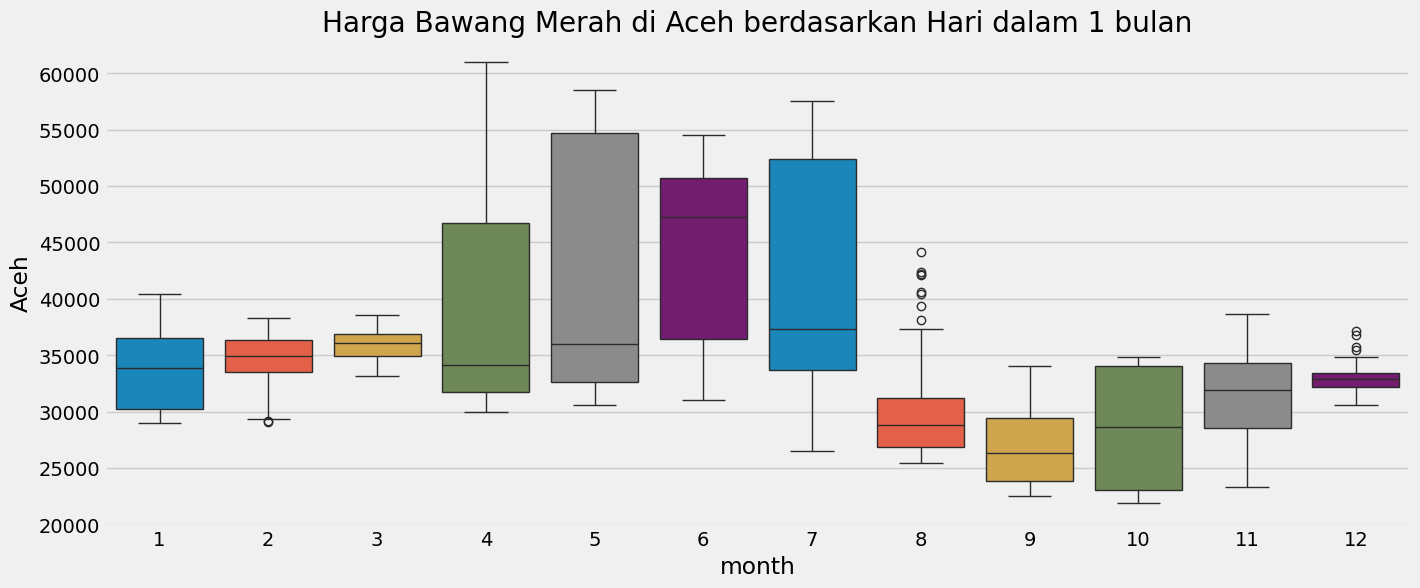

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_aceh, x='month', y='Aceh', palette=color_pal)
plt.title('Harga Bawang Merah di Aceh berdasarkan Hari dalam 1 bulan')
plt.show()

**Insight**: Sementara dalam hitungan bulan, kita bisa melihat tingkatan-tingkatan yang terjadi, yang membuat grafik dari time series ini berupa **Seasonal**

### 6. Modelling

- 6.1 Data Splitting

In [20]:
train_aceh = create_features(train_aceh)
test_aceh = create_features(test_aceh)

features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
target = 'Aceh'

# Reassign X_train, X_test, y_train, y_test
X_train = train_aceh[features]
y_train = train_aceh[target]
X_test = test_aceh[features]
y_test = test_aceh[target]

- 6.2 Modelling

- **GARCH Model Parameter:**
    - p (lag order of AR term): Menentukan jumlah lag dari komponen autoregressive dalam model.
    - q (lag order of MA term): Menentukan jumlah lag dari komponen moving average dalam model.
    - d (degree of differencing): Menentukan jumlah diferensiasi yang diperlukan untuk membuat data stasioner.
    - volatility model (e.g., GARCH, EGARCH, GJR-GARCH): Jenis model volatilitas yang digunakan untuk menangani heteroskedastisitas.
    - distribution (e.g., Normal, Student-t, Skewed-t): Distribusi yang digunakan untuk residu model.
    - maxiter: Jumlah iterasi maksimum yang digunakan dalam optimasi.
    - disp (display optimization output): Menentukan apakah proses fitting akan menampilkan output atau tidak.


In [21]:
# Fit GARCH model
garch_model = arch_model(y_train, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Make predictions
garch_forecast = garch_fit.forecast(horizon=len(y_test))
y_pred = garch_forecast.mean.iloc[-1].values

### 7. Evaluation

In [22]:
# Add the 'prediction' column to test_aceh
test_aceh['prediction'] = y_pred

# Calculate MAPE score
mape_aceh_score = mape(test_aceh['Aceh'], test_aceh['prediction'])
print(f'MAPE Score: {mape_aceh_score.round(2)}')

MAPE Score: 0.21


---
### 8. Apply for other 34 provinces

In [23]:
def train_predict_evaluate(df, province, cutoff_date='2024-01-01'):
    df = df.copy()

    # interpolasi NaN data
    df.interpolate(method='linear', inplace=True)

    # handle missing values
    df = handle_missing_values(df)

    # Tambahkan fitur-fitur waktu
    df = create_features(df)

    # Split data
    train = df.loc[df.index < cutoff_date]
    test = df.loc[df.index >= cutoff_date]

    # Features dan Target
    features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
    target = province

    # Reassign X_train, X_test, y_train, y_test
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]

    # Model
    model = arch_model(y_train, vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp='off')
    
    garch_forecast = garch_fit.forecast(horizon=len(y_test))
    y_pred = garch_forecast.mean.iloc[-1].values
    
    # Prediction
    test['prediction'] = y_pred
    mape_score = mape(test[target], test['prediction'])

    return model, mape_score, test

In [24]:
models = {}
mape_scores = {}

provinces = df.columns
for province in provinces:
    print(f"Training model untuk provinsi: {province}")

    model, mape_score, test = train_predict_evaluate(df, province)

    models[province] = model
    mape_scores[province] = mape_score

    print(f"MAPE Score: {mape_score.round(2)}")

Training model untuk provinsi: Aceh
MAPE Score: 0.21
Training model untuk provinsi: Bali
MAPE Score: 0.24
Training model untuk provinsi: Banten
MAPE Score: 0.22
Training model untuk provinsi: Bengkulu
MAPE Score: 0.21
Training model untuk provinsi: DI Yogyakarta
MAPE Score: 0.31
Training model untuk provinsi: DKI Jakarta
MAPE Score: 0.21
Training model untuk provinsi: Gorontalo
MAPE Score: 0.2
Training model untuk provinsi: Jambi
MAPE Score: 0.26
Training model untuk provinsi: Jawa Barat
MAPE Score: 0.22
Training model untuk provinsi: Jawa Tengah
MAPE Score: 0.26
Training model untuk provinsi: Jawa Timur
MAPE Score: 0.32
Training model untuk provinsi: Kalimantan Barat
MAPE Score: 0.13
Training model untuk provinsi: Kalimantan Selatan
MAPE Score: 0.21
Training model untuk provinsi: Kalimantan Tengah
MAPE Score: 0.18
Training model untuk provinsi: Kalimantan Timur
MAPE Score: 0.17
Training model untuk provinsi: Kalimantan Utara
MAPE Score: 0.23
Training model untuk provinsi: Kepulauan Ba

In [25]:
print("\nMAPE Scores per Provinsi:")
for province, score in mape_scores.items():
    print(f"{province}: {score.round(2)}")

# Rata-rata MAPE Score
mean_mape_score = np.mean(list(mape_scores.values()))
print(f"\nRata-rata MAPE Score: {mean_mape_score.round(2)}")


MAPE Scores per Provinsi:
Aceh: 0.21
Bali: 0.24
Banten: 0.22
Bengkulu: 0.21
DI Yogyakarta: 0.31
DKI Jakarta: 0.21
Gorontalo: 0.2
Jambi: 0.26
Jawa Barat: 0.22
Jawa Tengah: 0.26
Jawa Timur: 0.32
Kalimantan Barat: 0.13
Kalimantan Selatan: 0.21
Kalimantan Tengah: 0.18
Kalimantan Timur: 0.17
Kalimantan Utara: 0.23
Kepulauan Bangka Belitung: 0.22
Kepulauan Riau: 0.09
Lampung: 0.29
Maluku Utara: 0.38
Maluku: 0.23
Nusa Tenggara Barat: 0.3
Nusa Tenggara Timur: 0.25
Papua Barat: 0.38
Papua: 0.4
Riau: 0.2
Sulawesi Barat: 0.19
Sulawesi Selatan: 0.19
Sulawesi Tengah: 0.18
Sulawesi Tenggara: 0.2
Sulawesi Utara: 0.21
Sumatera Barat: 0.26
Sumatera Selatan: 0.22
Sumatera Utara: 0.19

Rata-rata MAPE Score: 0.23


### 9. Submission

> 9.1 **Load Test Set**

In [26]:
df_test = pd.read_csv(f"{path}/test/Bawang Merah.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

df_test.head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> 9.2 Prediksi berdasarkan provinsi menggunakan model yang berbeda-beda

In [27]:
def predict_test_set(test_set, model_dict, nama_bahan: str):
    predictions = []
    provinsi_list = test_set.columns
    
    for province in provinsi_list:
        model = model_dict[province]
        test = test_set[[province]].copy()
        test_feat = create_features(test)
        X_test = test_feat[features]

        # Fit model
        garch_fit = model.fit(disp='off')

        # Menyesuaikan horizon dengan panjang data uji
        horizon = min(len(test), len(y_test))
        forecast_result = model.forecast(params=garch_fit.params, horizon=horizon).mean
        
        # Pastikan jumlah prediksi sesuai dengan jumlah indeks
        test['prediction'] = forecast_result.iloc[-1, :horizon].values

        for date, pred in zip(test.index, test['prediction']):
            row = f'{nama_bahan}/{province}/{date.date()}'
            predictions.append([row, pred])

    return predictions

# Panggil fungsi dengan dataset uji
predictions_bawang_merah = predict_test_set(df_test, models, 'Bawang Merah')

# Simpan hasil ke CSV
output_bawang_merah = pd.DataFrame(predictions_bawang_merah, columns=['id', 'price'])
output_bawang_merah.to_csv('prediksi_bawang_merah.csv', index=False)


> 9.3 Lakukan untuk bahan-bahan lain

In [28]:
def train_model(df):
    models = {}
    mape_scores = {}
    provinces = df.columns
    for province in provinces:
        model, mape_score, test = train_predict_evaluate(df, province)

        models[province] = model
        mape_scores[province] = mape_score
    print("Rata-rata MAPE Score:", np.mean(list(mape_scores.values())))
    return models

In [29]:
# Bawang Putih Bonggol
model_bawang_putih_bonggol = train_model(df_list["Bawang Putih Bonggol"])

# Load test set Bawang Putih Bonggol
df_test = pd.read_csv(f"{path}/test/Bawang Putih Bonggol.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_bawang_putih_bonggol = predict_test_set(df_test, model_bawang_putih_bonggol, 'Bawang Putih Bonggol')
output_bawang_putih_bonggol = pd.DataFrame(predictions_bawang_putih_bonggol, columns=['id', 'price'])
output_bawang_putih_bonggol.to_csv('prediksi_bawang_putih_bonggol.csv', index=False)

Rata-rata MAPE Score: 0.18027936650730045


In [30]:
# Beras Medium
model_beras_medium = train_model(df_list["Beras Medium"])

# Load test set Beras Medium
df_test = pd.read_csv(f"{path}/test/Beras Medium.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_beras_medium = predict_test_set(df_test, model_beras_medium, 'Beras Medium')
output_beras_medium = pd.DataFrame(predictions_beras_medium, columns=['id', 'price'])
output_beras_medium.to_csv('prediksi_beras_medium.csv', index=False)

Rata-rata MAPE Score: 1.438548471998357


In [31]:
# Beras Premium
model_beras_premium = train_model(df_list["Beras Premium"])

# Load test set Beras Premium
df_test = pd.read_csv(f"{path}/test/Beras Premium.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_beras_premium = predict_test_set(df_test, model_beras_premium, 'Beras Premium')
output_beras_premium = pd.DataFrame(predictions_beras_premium, columns=['id', 'price'])
output_beras_premium.to_csv('prediksi_beras_premium.csv', index=False)

Rata-rata MAPE Score: 1.1271751168541897


In [32]:
# Cabai Merah Keriting
model_cabai_merah_keriting = train_model(df_list["Cabai Merah Keriting"])

# Load test set Cabai Merah Keriting
df_test = pd.read_csv(f"{path}/test/Cabai Merah Keriting.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_cabai_merah_keriting = predict_test_set(df_test, model_cabai_merah_keriting, 'Cabai Merah Keriting')
output_cabai_merah_keriting = pd.DataFrame(predictions_cabai_merah_keriting, columns=['id', 'price'])
output_cabai_merah_keriting.to_csv('prediksi_cabai_merah_keriting.csv', index=False)

Rata-rata MAPE Score: 0.32817064292532416


In [33]:
# Cabai Rawit Merah
model_cabai_rawit_merah = train_model(df_list["Cabai Rawit Merah"])

# Load test set Cabai Rawit Merah
df_test = pd.read_csv(f"{path}/test/Cabai Rawit Merah.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_cabai_rawit_merah = predict_test_set(df_test, model_cabai_rawit_merah, 'Cabai Rawit Merah')
output_cabai_rawit_merah = pd.DataFrame(predictions_cabai_rawit_merah, columns=['id', 'price'])
output_cabai_rawit_merah.to_csv('prediksi_cabai_rawit_merah.csv', index=False)

Rata-rata MAPE Score: 0.378002229486624


In [34]:
# Daging Ayam Ras
model_daging_ayam_ras = train_model(df_list["Daging Ayam Ras"])

# Load test set Daging Ayam Ras
df_test = pd.read_csv(f"{path}/test/Daging Ayam Ras.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_daging_ayam_ras = predict_test_set(df_test, model_daging_ayam_ras, 'Daging Ayam Ras')
output_daging_ayam_ras = pd.DataFrame(predictions_daging_ayam_ras, columns=['id', 'price'])
output_daging_ayam_ras.to_csv('prediksi_daging_ayam_ras.csv', index=False)

Rata-rata MAPE Score: 0.12996319780492094


In [35]:
# Daging Sapi Murni
model_daging_sapi_murni = train_model(df_list["Daging Sapi Murni"])

# Load test set Daging Sapi Murni
df_test = pd.read_csv(f"{path}/test/Daging Sapi Murni.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_daging_sapi_murni = predict_test_set(df_test, model_daging_sapi_murni, 'Daging Sapi Murni')
output_daging_sapi_murni = pd.DataFrame(predictions_daging_sapi_murni, columns=['id', 'price'])
output_daging_sapi_murni.to_csv('prediksi_daging_sapi_murni.csv', index=False)

Rata-rata MAPE Score: 0.752679645269569


In [36]:
# Gula Konsumsi
model_gula_konsumsi = train_model(df_list["Gula Konsumsi"])

# Load test set Gula Konsumsi
df_test = pd.read_csv(f"{path}/test/Gula Konsumsi.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_gula_konsumsi = predict_test_set(df_test, model_gula_konsumsi, 'Gula Konsumsi')
output_gula_konsumsi = pd.DataFrame(predictions_gula_konsumsi, columns=['id', 'price'])
output_gula_konsumsi.to_csv('prediksi_gula_konsumsi.csv', index=False)

Rata-rata MAPE Score: 0.8760902902390301


c:\Users\Frederick\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [37]:
# Minyak Goreng Curah
model_minyak_goreng_curah = train_model(df_list["Minyak Goreng Curah"])

# Load test set Minyak Goreng Curah
df_test = pd.read_csv(f"{path}/test/Minyak Goreng Curah.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_minyak_goreng_curah = predict_test_set(df_test, model_minyak_goreng_curah, 'Minyak Goreng Curah')
output_minyak_goreng_curah = pd.DataFrame(predictions_minyak_goreng_curah, columns=['id', 'price'])
output_minyak_goreng_curah.to_csv('prediksi_minyak_goreng_curah.csv', index=False)

Rata-rata MAPE Score: 1.110285149225004


In [38]:
# Minyak Goreng Kemasan Sederhana
model_minyak_goreng_kemasan_sederhana = train_model(df_list["Minyak Goreng Kemasan Sederhana"])

# Load test set Minyak Goreng Kemasan Sederhana
df_test = pd.read_csv(f"{path}/test/Minyak Goreng Kemasan Sederhana.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_minyak_goreng_kemasan_sederhana = predict_test_set(df_test, model_minyak_goreng_kemasan_sederhana, 'Minyak Goreng Kemasan Sederhana')
output_minyak_goreng_kemasan_sederhana = pd.DataFrame(predictions_minyak_goreng_kemasan_sederhana, columns=['id', 'price'])
output_minyak_goreng_kemasan_sederhana.to_csv('prediksi_minyak_goreng_kemasan_sederhana.csv', index=False)

Rata-rata MAPE Score: 0.8846265030843639


In [39]:
# Telur Ayam Ras
model_telur_ayam_ras = train_model(df_list["Telur Ayam Ras"])

# Load test set Telur Ayam Ras
df_test = pd.read_csv(f"{path}/test/Telur Ayam Ras.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_telur_ayam_ras = predict_test_set(df_test, model_telur_ayam_ras, 'Telur Ayam Ras')
output_telur_ayam_ras = pd.DataFrame(predictions_telur_ayam_ras, columns=['id', 'price'])
output_telur_ayam_ras.to_csv('prediksi_telur_ayam_ras.csv', index=False)

Rata-rata MAPE Score: 0.15256001780913178


In [40]:
# Tepung Terigu (Curah)
model_tepung_terigu_curah = train_model(df_list["Tepung Terigu (Curah)"])

# Load test set Tepung Terigu (Curah)
df_test = pd.read_csv(f"{path}/test/Tepung Terigu (Curah).csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_tepung_terigu_curah = predict_test_set(df_test, model_tepung_terigu_curah, 'Tepung Terigu (Curah)')
output_tepung_terigu_curah = pd.DataFrame(predictions_tepung_terigu_curah, columns=['id', 'price'])
output_tepung_terigu_curah.to_csv('prediksi_tepung_terigu_curah.csv', index=False)

Rata-rata MAPE Score: 2.1905804550914874


In [41]:
# Merge all .csv into one
output = pd.concat([
    output_bawang_merah,
    output_bawang_putih_bonggol,
    output_beras_medium,
    output_beras_premium,
    output_cabai_merah_keriting,
    output_cabai_rawit_merah,
    output_daging_ayam_ras,
    output_daging_sapi_murni,
    output_gula_konsumsi,
    output_minyak_goreng_curah,
    output_minyak_goreng_kemasan_sederhana,
    output_telur_ayam_ras,
    output_tepung_terigu_curah
])

output.head()

,id,price
0,Bawang Merah/Aceh/2024-10-01,33633.982136
1,Bawang Merah/Aceh/2024-10-02,33633.982136
2,Bawang Merah/Aceh/2024-10-03,33633.982136
3,Bawang Merah/Aceh/2024-10-04,33633.982136
4,Bawang Merah/Aceh/2024-10-05,33633.982136


In [42]:
output.to_csv('submission.csv', index=False)